<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8/8/gigachat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для работы с GigaChat API нужно зарегистрироваться на платформе Сбер

https://developers.sber.ru/portal/products/gigachat-api

Существует несколько тарифов, в том числе Freemium.

В личном кабинете нужно в списке "Ключевые действия" выбрать "Настроить API Перейти к ключам".

Далее нужно получить авторизационный токен, чтобы делать запросы к API GigaChat.

Authorization key
Passed in the request to obtain an Access token


Делаем нужные импорты и подключаем библиотеку GigaChat

In [ ]:
print()

In [ ]:
!pip -q install GigaChat

In [ ]:
from gigachat import GigaChat
from google.colab import userdata
import requests
import json
import uuid

In [ ]:
client_id = userdata.get('SBER_ID')
secret = userdata.get('SBER_SECRET')
auth = userdata.get('SBER_AUTH')

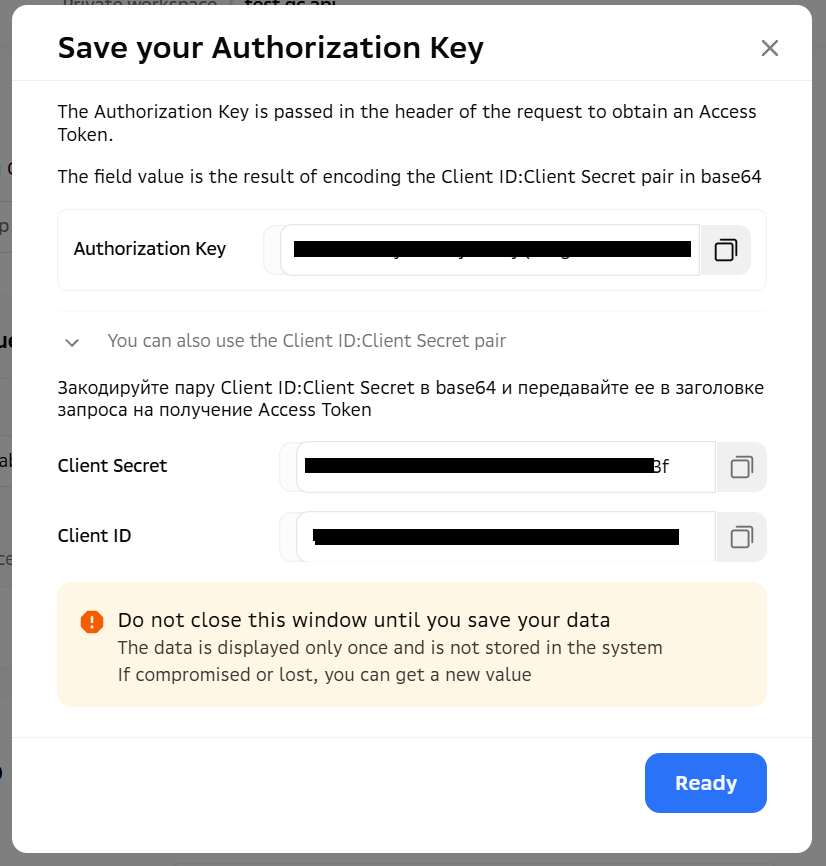

In [ ]:
import base64
credentials = f"{client_id}:{secret}"
encoded_credentials = base64.b64encode(credentials.encode('utf-8')).decode('utf-8')

In [ ]:
encoded_credentials == auth

True

# Пример 1
Покажем, как можно получить ответ от GigaChat.

In [ ]:
#with GigaChat(credentials="DoNotTryToRepeatFakeTokenTgwMDk2NWItMTNhYmY4N2RmOjIyZTU5LWNzllVlMDEtNDVjOS04YzVhLThiZWIxZjdkYmNmNw==", ca_bundle_file="russian_trusted_root_ca.cer") as giga:
with GigaChat(credentials= auth, verify_ssl_certs = False) as giga:
    response = giga.chat("Ответь кратко. Как называется естественный спутник Земли?")
    print(response.choices[0].message.content)

Луна.


#Пример 2
Покажем, как программно получать авторизационный токен, необходимый для запросов к API.

https://developers.sber.ru/docs/ru/gigachat/api/reference/rest/post-token

In [ ]:
def get_token(auth_token, scope='GIGACHAT_API_PERS'):
    """
      Выполняет POST-запрос к эндпоинту, который выдает токен.

      Параметры:
      - auth_token (str): токен авторизации, необходимый для запроса.
      - область (str): область действия запроса API. По умолчанию — «GIGACHAT_API_PERS».

      Возвращает:
      - ответ API, где токен и срок его "годности".
      """
    # Создадим идентификатор UUID (36 знаков)
    rq_uid = str(uuid.uuid4())

    # API URL
    url = "https://ngw.devices.sberbank.ru:9443/api/v2/oauth"

    # Заголовки
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded',
        'Accept': 'application/json',
        'RqUID': rq_uid,
        'Authorization': f'Basic {auth_token}'
    }

    # Тело запроса
    payload = {
        'scope': scope
    }

    try:
        # Делаем POST запрос с отключенной SSL верификацией
        # (можно скачать сертификаты Минцифры, тогда отключать проверку не надо)
        response = requests.post(url, headers=headers, data=payload, verify=False)
        return response
    except requests.RequestException as e:
        print(f"Ошибка: {str(e)}")
        return 1


In [ ]:
response = get_token(auth)
if response != 1:
  print(response.text)
  giga_token = response.json()['access_token']

{"access_token":"eyJjdHkiOiJqd3QiLCJlbmMiOiJBMjU2Q0JDLUhTNTEyIiwiYWxnIjoiUlNBLU9BRVAtMjU2In0.dJyNI0sSVUb9YpJtcedssc92RSQqD9qMXAb4GjTjfBoAsCb3T4Jr7F2vBNBPlLcS2idM1NBIytTYoV4Du0QjfdpZVvIsUO4sY1EDLfFm-1mreP_pSI6vL8qPla-eRdZkYt8dn8tQc9MnMC73UbVSj2RO0UvBVpK94k6S9JeYPa8cvVc9LifRtGSLBgld_hKRcEe0eT-qNONZO5ng-lb0wK60B43mvfztT06Xe322gqRS3Ao5okMvh-FnTGPnZ5rL3pvmMoL8aBQKBsK6uCnbcWzTCvwwF8vK5IXIEeshrFL7dM85BfY1V-f3xofWutFRj6RhmM3jP_RTXTk0uVJl2A.WpDA-Nq7imVOhMvgzJltKQ.2J8J-IY3o5lFvfdT6KJULsEvUa0Lll4hgTBzhAP8c2NIRA7La2oOm8Vk8C__7e46zgki7-oSj0mDejzYcnNJlpUbM_G5ngArhE-3z6Qd_u4VeUvhLsUTd1a0WMbX1NiiKzK-vsrOLScna8ALH-iIdcW12Tg3rKyvcPdHJgMLjJDHCFM0gkYsRg6eJiKPO-4s0R-mWoaGoQ-sDdZipZQPnTlWTmR6G4CCm6Aam8YXkowh-SQieTwfdxhTC-mwawsDLAGIxrSCzITEuzZ7e9udYtFeMWve5A9bwk3XyxR6v3Q8E4cH0hFdpBr3cFKjOQb65fz5e1DNpvT7XCDiG8WUzFEzGLwjTIcdGKMoplnpwuaq8ZjBv12HIFzBp74qWQxW5VNsQNl-_M00dbL3GsQD43gtfu2ok0qxFaScC5qzQZMXe_ig9yaZiyQi0z1XsfF1fIY7nUOJHBYGMmDT1TePpbIHu6uEi3PuVH44NIT3zg08VLpk0YG7aCD8gGN8ZvY0Y9_cb5EQWPTMOspL4cVL4hGNWfWsR

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ngw.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
giga_token

'eyJjdHkiOiJqd3QiLCJlbmMiOiJBMjU2Q0JDLUhTNTEyIiwiYWxnIjoiUlNBLU9BRVAtMjU2In0.rks_i316bH6gvj1zaW0nOVsWHxzWV4-G3DlwrNMJlAhj1dmhKFI5dJ77ZKtatMHZEFVfdU5fqPtqRRHK0mssZx1NONeEqvNE7ZISD1Ad7fuUS4SpeUtqGrxvDSb-IFpB9nwkpo5NL_-gVZkK-hxhiY2bH8ZBsZ1VAJlCWepUf-cy7hyRghb01TT_94J2utCFm0GsiCl9GrDG-GfzkOEyoel34mn5bTU9XmpQsPFW7w3fpduoc5UQbmwBctHKZjsupoSuzk4KHuTsYoP6efWjTwfKmwv9fimaNuGQ-ceA9v0Z9DdjP6cJDEW3qocGgoLj8Dw-2aECdW-cSGuql-_v_w.EGtds7eRsdg8h98YsUqrpw.dWkk_QBy8XuzxYSCdf2GijDA7p2K5toenK3IiGV7iyMllbcnDxvWaL_mfqJ6DYXbDt12I9pAZDw7Oz60gdv_4vt5UCushgF232bHlxmZiHHIwMKo1V3_M6DjdN9_nRNTcmU_f_tlRtqwmhRC9A4DOL-93wnzYD0S79ojfXQVXOoCoVt1QV4jTi1nKJllyc4DL9cYNAcnotGQYCd9OWXOkQBuyORwSqRxGHEsIRiOqL62Bpcv1QO_lXca2rwFCTuNjT5KxB-LjZls5FL1_le4CoNpaXFlh-iDQ1F3YG2St9FOgP3iBFbNG5bFmGeg9Eb84KjVC2PDJWu3tOJ-lq0-roM6ciClQD1xItM9kThsqnmm0KJPu5NzBvt0LGdzdFaR6iXHj1GzfWsKiFoKDGZOoioGgCByXGP5fOktXLTY3dzX8ugxUfM6OwugdQP-J6hDrc-ZztpOkZfCsjrGKm3JiVp9CqwrpjD9fsX_UBj0fG1NO7K24R4wl3beUbuO0rbo4PZxWajG8sNq3yJ7cJmtgBTt1CESZfZWIETEAnIRVnjtL

# Пример 3
Получим перечень моделей.

https://developers.sber.ru/docs/ru/gigachat/api/reference/rest/get-models

In [ ]:
url = "https://gigachat.devices.sberbank.ru/api/v1/models"

payload={}
headers = {
  'Accept': 'application/json',
  'Authorization': f'Bearer {giga_token}'
}

response = requests.request("GET", url, headers=headers, data=payload, verify=False)

print(response.text)

{"object":"list","data":[{"id":"GigaChat","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2-Max","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2-Max-preview","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2-Pro","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2-Pro-preview","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-2-preview","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-Max","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-Max-preview","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-Plus","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-Plus-preview","object":"model","owned_by":"salutedevices","type":"chat"},{"id":"GigaChat-Pro","object":"model","owned_by":"sal

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gigachat.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
json_formatted_str = json.loads(response.text)
json_formatted_str

{'object': 'list',
 'data': [{'id': 'GigaChat',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2-Max',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2-Max-preview',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2-Pro',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2-Pro-preview',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-2-preview',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-Max',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-Max-preview',
   'object': 'model',
   'owned_by': 'salutedevices',
   'type': 'chat'},
  {'id': 'GigaChat-Plus',
   'object': 'model',
  

# Пример 4
Покажем, как делать запрос на генерацию текста.

In [ ]:
def get_chat_completion(auth_token, user_message):
    """
    Отправляет POST-запрос к API чата для получения ответа от модели GigaChat.

    Параметры:
    - auth_token (str): Токен для авторизации в API.
    - user_message (str): Сообщение от пользователя, для которого нужно получить ответ.

    Возвращает:
    - str: Ответ от API в виде текстовой строки.
    """
    # URL API, к которому мы обращаемся
    url = "https://gigachat.devices.sberbank.ru/api/v1/chat/completions"

    # Подготовка данных запроса в формате JSON
    payload = json.dumps({
        "model": "GigaChat",  # Используемая модель
        "messages": [
            {
                "role": "user",  # Роль отправителя (пользователь)
                "content": user_message  # Содержание сообщения
            }
        ],
        "temperature": 0.5,  # Температура генерации
        "top_p": 0.1,  # Параметр top_p для контроля разнообразия ответов
        "n": 1,  # Количество возвращаемых ответов
        "stream": False,  # Потоковая ли передача ответов
        "max_tokens": 256,  # Максимальное количество токенов в ответе
        "repetition_penalty": 1,  # Штраф за повторения
        "update_interval": 0  # Интервал обновления (для потоковой передачи)
    })

    # Заголовки запроса
    headers = {
        'Content-Type': 'application/json',  # Тип содержимого - JSON
        'Accept': 'application/json',  # Принимаем ответ в формате JSON
        'Authorization': f'Bearer {auth_token}'  # Токен авторизации
    }

    # Выполнение POST-запроса и возвращение ответа
    try:
        response = requests.request("POST", url, headers=headers, data=payload, verify=False)
        return response
    except requests.RequestException as e:
        # Обработка исключения в случае ошибки запроса
        print(f"Произошла ошибка: {str(e)}")
        return 1

In [ ]:
answer = get_chat_completion(giga_token, 'Отпуск и пособие по беременности и родам при многоплодной беременности?')

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gigachat.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'choices': [{'message': {'content': 'Многоплодная беременность — это беременность, при которой ожидается рождение двух или более детей. В таком случае женщина имеет право на определенные льготы и пособия, которые отличаются от тех, что предоставляются при одноплодной беременности.\n\n### 1. **Отпуск по беременности и родам**\n\nПри многоплодной беременности отпуск по беременности и родам начинается раньше и длится дольше, чем при одноплодной. В России отпуск по беременности и родам предоставляется на основании листка нетрудоспособности, который выдает врач-гинеколог или акушер-гинеколог.\n\n- **Сроки отпуска**:\n  - При многоплодной беременности отпуск по беременности и родам составляет **194 календарных дня**: **84 дня до родов** и **110 дней после родов**.\n  - Если роды прошли с осложнениями, то к послеродовому отпуску добавляется еще **16 дней**.\n\n- **Оформление отпуска**:\n  - Женщина должна предоставить работодателю листок нетрудоспособности и написать заявление на отпуск.\n  

In [ ]:
answer.json()

{'choices': [{'message': {'content': 'Многоплодная беременность — это беременность, при которой ожидается рождение двух или более детей. В случае многоплодной беременности женщина имеет право на определенные льготы и пособия, которые отличаются от тех, что предоставляются при одноплодной беременности.\n\n### 1. **Отпуск по беременности и родам**\n\nПри многоплодной беременности отпуск по беременности и родам предоставляется на более длительный срок, чем при одноплодной. В России отпуск по беременности и родам делится на два периода:\n\n- **Дородовый отпуск**: 84 дня.\n- **Послеродовый отпуск**: 110 дней (если роды прошли без осложнений) или 124 дня (если были осложнения).\n\nТаким образом, общий отпуск по беременности и родам при многоплодной беременности составляет **194 дня** (84 + 110) или **210 дней** (84 + 124), в зависимости от обстоятельств.\n\n### 2. **Пособие по беременности и родам**\n\nПособие по беременности и родам выплачивается единовременно',
    'role': 'assistant'},
  

In [ ]:
print(answer.json()['choices'][0]['message']['content'])

Многоплодная беременность — это беременность, при которой ожидается рождение двух или более детей. В случае многоплодной беременности женщина имеет право на определенные льготы и пособия, которые отличаются от тех, что предоставляются при одноплодной беременности.

### 1. **Отпуск по беременности и родам**

При многоплодной беременности отпуск по беременности и родам предоставляется на более длительный срок, чем при одноплодной. В России отпуск по беременности и родам делится на два периода:

- **Дородовый отпуск**: 84 дня.
- **Послеродовый отпуск**: 110 дней (если роды прошли без осложнений) или 124 дня (если были осложнения).

Таким образом, общий отпуск по беременности и родам при многоплодной беременности составляет **194 дня** (84 + 110) или **210 дней** (84 + 124), в зависимости от обстоятельств.

### 2. **Пособие по беременности и родам**

Пособие по беременности и родам выплачивается единовременно


In [ ]:
from IPython.display import display, Markdown
display(Markdown(answer.json()['choices'][0]['message']['content']))

Многоплодная беременность — это беременность, при которой ожидается рождение двух или более детей. В случае многоплодной беременности женщина имеет право на определенные льготы и пособия, которые отличаются от тех, что предоставляются при одноплодной беременности.

### 1. **Отпуск по беременности и родам**

При многоплодной беременности отпуск по беременности и родам предоставляется на более длительный срок, чем при одноплодной. В России отпуск по беременности и родам делится на два периода:

- **Дородовый отпуск**: 84 дня.
- **Послеродовый отпуск**: 110 дней (если роды прошли без осложнений) или 124 дня (если были осложнения).

Таким образом, общий отпуск по беременности и родам при многоплодной беременности составляет **194 дня** (84 + 110) или **210 дней** (84 + 124), в зависимости от обстоятельств.

### 2. **Пособие по беременности и родам**

Пособие по беременности и родам выплачивается единовременно

# Пример 4

Диалог

In [ ]:
def get_chat_completion(auth_token, user_message, conversation_history=None):
    """
    Отправляет POST-запрос к API чата для получения ответа от модели GigaChat в рамках диалога.

    Параметры:
    - auth_token (str): Токен для авторизации в API.
    - user_message (str): Сообщение от пользователя, для которого нужно получить ответ.
    - conversation_history (list): История диалога в виде списка сообщений (опционально).

    Возвращает:
    - response (requests.Response): Ответ от API.
    - conversation_history (list): Обновленная история диалога.
    """
    # URL API, к которому мы обращаемся
    url = "https://gigachat.devices.sberbank.ru/api/v1/chat/completions"

    # Если история диалога не предоставлена, инициализируем пустым списком
    if conversation_history is None:
        conversation_history = []

    # Добавляем сообщение пользователя в историю диалога
    conversation_history.append({
        "role": "user",
        "content": user_message
    })

    # Подготовка данных запроса в формате JSON
    payload = json.dumps({
        "model": "GigaChat:latest",
        "messages": conversation_history,
        "temperature": 0.5,
        "top_p": 0.1,
        "n": 1,
        "stream": False,
        "max_tokens": 256,
        "repetition_penalty": 1,
        "update_interval": 0
    })

    # Заголовки запроса
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'Authorization': f'Bearer {auth_token}'
    }

    # Выполнение POST-запроса и возвращение ответа
    try:
        response = requests.post(url, headers=headers, data=payload, verify=False)
        response_data = response.json()
        print(response_data)

        # Добавляем ответ модели в историю диалога
        conversation_history.append({
            "role": "assistant",
            "content": response_data['choices'][0]['message']['content']
        })

        return response, conversation_history
    except requests.RequestException as e:
        # Обработка исключения в случае ошибки запроса
        print(f"Произошла ошибка: {str(e)}")
        return None, conversation_history

In [ ]:
# Пример использования функции для диалога

conversation_history = []

# Пользователь отправляет первое сообщение
response, conversation_history = get_chat_completion(giga_token, "В каком возрасте проводится первая вакцинация от кори в РФ?", conversation_history)

# Пользователь отправляет следующее сообщение, продолжая диалог
response, conversation_history = get_chat_completion(giga_token, "Какая тактика догоняющей вакцинации у недоношенных детей?", conversation_history)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gigachat.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'choices': [{'message': {'content': 'Первая вакцинация от кори в России проводится в возрасте **12 месяцев**.', 'role': 'assistant'}, 'index': 0, 'finish_reason': 'stop'}], 'created': 1745296230, 'model': 'GigaChat:1.0.26.20', 'object': 'chat.completion', 'usage': {'prompt_tokens': 26, 'completion_tokens': 20, 'total_tokens': 46, 'precached_prompt_tokens': 0}}


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gigachat.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'choices': [{'message': {'content': 'Догоняющая вакцинация у недоношенных детей — это стратегия, при которой такие дети получают прививки по индивидуальному графику, учитывающему их состояние здоровья и степень недоношенности.\n\nОсновные моменты догоняющей вакцинации у недоношенных детей:\n\n1. **Сроки вакцинации**:\n   - Первая вакцинация против кори, краснухи и паротита (КПК) проводится в возрасте **15 месяцев**, а не в 12 месяцев, как для доношенных детей.\n   - Вакцинация против пневмококковой инфекции проводится в 13 месяцев, а не в 12 месяцев.\n   - Вакцинация против гепатита В проводится в 2 месяца, а не в 1 месяц.\n\n2. **Группы риска**:\n   - Недоношенные дети с низкой массой тела при рождении (менее 2 кг) могут получать вакцины с более раннего возраста, чем обычно.\n   - Дети с хроническими заболеваниями или иммунодефицитными состояниями также могут', 'role': 'assistant'}, 'index': 0, 'finish_reason': 'length'}], 'created': 1745296232, 'model': 'GigaChat:1.0.26.20', 'object

In [ ]:
conversation_history

[{'role': 'user',
  'content': 'В каком возрасте проводится первая вакцинация от кори?'},
 {'role': 'assistant',
  'content': 'Первая вакцинация от кори обычно проводится в возрасте **12–15 месяцев**. Вторая ревакцинация — в возрасте **4–6 лет**. Эти сроки могут немного варьироваться в зависимости от конкретной страны и календаря вакцинации.'},
 {'role': 'user',
  'content': 'Ккая тактика догоняющей вакцинации у недоношенных детей?'},
 {'role': 'assistant',
  'content': 'У недоношенных детей тактика догоняющей вакцинации может варьироваться в зависимости от их состояния здоровья, гестационного возраста и массы тела при рождении. В общем случае, недоношенные дети могут получать вакцины по индивидуальному графику, который учитывает их специфические потребности.\n\nОсновные моменты:\n\n1. **Первая вакцинация**:\n   - Недоношенные дети, рожденные до 28 недель гестационного возраста, могут получать первую вакцинацию позже, чем в 12 месяцев. Например, вакцинацию против кори, краснухи и парот

In [ ]:
display(Markdown(response.json()['choices'][0]['message']['content']))

Догоняющая вакцинация у недоношенных детей — это стратегия, при которой такие дети получают прививки по индивидуальному графику, учитывающему их состояние здоровья и степень недоношенности.

Основные моменты догоняющей вакцинации у недоношенных детей:

1. **Сроки вакцинации**:
   - Первая вакцинация против кори, краснухи и паротита (КПК) проводится в возрасте **15 месяцев**, а не в 12 месяцев, как для доношенных детей.
   - Вакцинация против пневмококковой инфекции проводится в 13 месяцев, а не в 12 месяцев.
   - Вакцинация против гепатита В проводится в 2 месяца, а не в 1 месяц.

2. **Группы риска**:
   - Недоношенные дети с низкой массой тела при рождении (менее 2 кг) могут получать вакцины с более раннего возраста, чем обычно.
   - Дети с хроническими заболеваниями или иммунодефицитными состояниями также могут

# Пример 5

Использование системного промпта.

Системный промпт определяет роль, задает контекст и особенности общения бота с пользователем.

In [ ]:
conversation_history = [{
    'role': 'system',
    'content': 'Отвечай как врач, заведующий педиатрическим отделением в поликлинике. К тебе обратился участковый фельдшер за консультацией.'
}
]

In [ ]:
response, conversation_history = get_chat_completion(giga_token, 'На сколько дней может фельдшер выписать листок нетрудоспособности?', conversation_history)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gigachat.devices.sberbank.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'choices': [{'message': {'content': 'Фельдшер не имеет права выписывать листок нетрудоспособности. Это может сделать только врач.', 'role': 'assistant'}, 'index': 0, 'finish_reason': 'stop'}], 'created': 1745296283, 'model': 'GigaChat:1.0.26.20', 'object': 'chat.completion', 'usage': {'prompt_tokens': 59, 'completion_tokens': 23, 'total_tokens': 82, 'precached_prompt_tokens': 0}}


Это, разумеется, пример галлюцинации. На самом деле фельдшер выдает и продлевает листок нетрудоспособности на срок до 10 календарных дней включительно.

In [ ]:
display(Markdown(response.json()['choices'][0]['message']['content']))

Фельдшер не имеет права выписывать листок нетрудоспособности. Это может сделать только врач.